## Inspecting some games with 3 players (plotting state space)

In [4]:
from corpgame import PolymatrixGame
from visualize import *
import numpy as np

round:  1
strategy:  [0, 1, 0]
state transition: 
 [[ 1. -2.]
 [-2.  2.]
 [ 1.  0.]]
payoff:  [-1.  0.  1.]
state: 
 [[ 5.  2.]
 [ 0.  8.]
 [11.  0.]]
pne:  {'010': [-1.0, 1.0, 0.0]}

round:  2
strategy:  [0, 0, 1]
state transition: 
 [[  5.5  -1. ]
 [  5.5  -4. ]
 [-11.    5. ]]
payoff:  [ 4.5  1.5 -6. ]
state: 
 [[10.5  1. ]
 [ 5.5  4. ]
 [ 0.   5. ]]
pne:  {'001': [-0.5, -2.0, 2.5]}

round:  3
strategy:  [1, 1, 0]
state transition: 
 [[-5.25  2.5 ]
 [-2.75  2.5 ]
 [ 8.   -5.  ]]
payoff:  [-2.75 -0.25  3.  ]
state: 
 [[5.25 3.5 ]
 [2.75 6.5 ]
 [8.   0.  ]]
pne:  {'000': [0.0, 0.0, 0.0]}

round:  4
strategy:  [0, 1, 1]
state transition: 
 [[ 5.375 -3.5  ]
 [-1.375  1.75 ]
 [-4.     1.75 ]]
payoff:  [ 1.875  0.375 -2.25 ]
state: 
 [[10.625  0.   ]
 [ 1.375  8.25 ]
 [ 4.     1.75 ]]
pne:  {}



C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


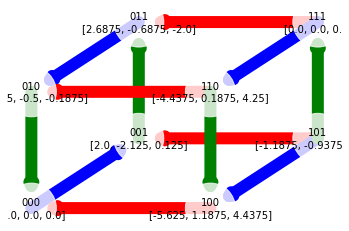

In [9]:
game_settings = {
            "start_populations_matrix": [[4,4],[2,6],[10,0]],
    "player_labels": [1,2,3],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error",
        'player_labels':[1,2,3]
        }
game = PolymatrixGame(**game_settings)
strategies = [[0, 1, 0],[0, 0, 1], [1, 1, 0], [0, 1, 1]]
X = [[]]*(len(strategies)+1)
X[0] = game.state
for i, p in enumerate(strategies):
    game.play(p)
    game.solve()
    X[i+1] = game.state
    print('round: ', i+1)
    print('strategy: ', p)
    print('state transition: \n', X[i+1]-X[i])
    print('payoff: ', np.sum(X[i+1]-X[i], axis=1))
    print('state: \n', game.state)
    print('pne: ', game.pne)
    print()

draw_3player_states(game.payoffs, game.pne)

In [27]:
%time
def all_matrices(start, end):
    matrices = []
    for a1 in range(start, end):
        for a2 in range(start, end):
            for b1 in range(start, end):
                for b2 in range(start, end):
                    for c1 in range(start, end):
                        for c2 in range(start, end):
                            matrices.append([[a1,a2],[b1,b2],[c1,c2]])
    return matrices

m = all_matrices(2,8)

Wall time: 0 ns


In [30]:
from collections import defaultdict
from tqdm import tqdm
apne = defaultdict()
for [[a1,a2],[b1,b2],[c1,c2]] in tqdm(m):
    game_settings = {
        "start_populations_matrix": [[a1,a2],[b1,b2],[c1,c2]],
        "player_labels": [1,2,3],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error"
    }
    game = PolymatrixGame(**game_settings)
    game.solve()
    apne[str([[a1,a2],[b1,b2],[c1,c2]])]=len(game.pne)
    pass






  0%|                                                                                                                                                                                                                       | 0/46656 [00:00<?, ?it/s]




  0%|                                                                                                                                                                                                               | 5/46656 [00:00<18:25, 42.21it/s]




  0%|                                                                                                                                                                                                              | 10/46656 [00:00<17:44, 43.83it/s]




  0%|                                                                                                                                                                                                              | 15/46656 [00:00<17:49, 43.60i

  0%|▋                                                                                                                                                                                                            | 169/46656 [00:03<15:32, 49.87it/s]




  0%|▊                                                                                                                                                                                                            | 175/46656 [00:03<16:09, 47.94it/s]




  0%|▊                                                                                                                                                                                                            | 180/46656 [00:03<16:09, 47.92it/s]




  0%|▊                                                                                                                                                                                                            | 186/46656 [00:03<15:45, 49.13it/s]


  1%|█▌                                                                                                                                                                                                           | 345/46656 [00:07<16:33, 46.63it/s]




  1%|█▌                                                                                                                                                                                                           | 350/46656 [00:07<17:32, 44.01it/s]




  1%|█▌                                                                                                                                                                                                           | 356/46656 [00:07<16:53, 45.66it/s]




  1%|█▌                                                                                                                                                                                                           | 362/46656 [00:07<16:22, 47.11it/s]


  1%|██▎                                                                                                                                                                                                          | 518/46656 [00:10<16:52, 45.55it/s]




  1%|██▎                                                                                                                                                                                                          | 523/46656 [00:11<17:29, 43.97it/s]




  1%|██▎                                                                                                                                                                                                          | 528/46656 [00:11<19:48, 38.83it/s]




  1%|██▎                                                                                                                                                                                                          | 533/46656 [00:11<19:11, 40.07it/s]


  1%|██▉                                                                                                                                                                                                          | 679/46656 [00:14<18:58, 40.37it/s]




  1%|███                                                                                                                                                                                                          | 684/46656 [00:14<18:28, 41.47it/s]




  1%|███                                                                                                                                                                                                          | 689/46656 [00:14<18:01, 42.48it/s]




  1%|███                                                                                                                                                                                                          | 694/46656 [00:15<17:59, 42.57it/s]


  2%|███▋                                                                                                                                                                                                         | 842/46656 [00:18<16:27, 46.37it/s]




  2%|███▋                                                                                                                                                                                                         | 847/46656 [00:18<16:41, 45.72it/s]




  2%|███▋                                                                                                                                                                                                         | 852/46656 [00:18<16:47, 45.48it/s]




  2%|███▊                                                                                                                                                                                                         | 858/46656 [00:18<16:12, 47.08it/s]


KeyboardInterrupt: 

{'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


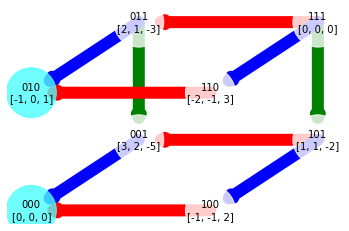

In [2]:
#example with 2 pne
game_settings = {
        "start_populations_matrix": [[4,4],[2,6],[10,0]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error",
    'player_labels':[1,2,3]
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

In [4]:
# checking all possible payoffs 4 states ahead
from itertools import product
strategies = [p for p in product([0,1], repeat = 3)]
strategies2 = [p for p in product([0,1], repeat = 3)]
for s1 in strategies:
    game_settings = {
            "start_populations_matrix": [[4,4],[2,6],[10,0]],
            "topology": "fully_connected",
            'alpha': 1.0,
            'log_level': "error",
        'player_labels':[1,2,3]
        }
    game = PolymatrixGame(**game_settings)
    game.play(list(s1))
    game.solve()
    state = list(game.state)
    print(s1, game.pne)
    for s2 in strategies:
        game_settings['start_populations_matrix'] = state
        game = PolymatrixGame(**game_settings)
        game.play(s2)
        game.solve()
        state2 = list(game.state)
        print(s1,s2, game.pne)
        for s3 in strategies:
            game_settings['start_populations_matrix'] = state2
            game = PolymatrixGame(**game_settings)
            game.play(s3)
            game.solve()
            state3 = list(game.state)
            print(s1,s2,s3, game.pne)
            for s4 in strategies:
                game_settings['start_populations_matrix'] = state3
                game = PolymatrixGame(**game_settings)
                game.play(s4)
                game.solve()
                print(s1,s2,s3, s4, game.pne)

(0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 1, 0) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) (0, 0, 0) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (0, 0, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.5, -0.75, 1.2

(0, 0, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-1.125, -1.375, 2.5]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 1, 0) {'010': [-1.125, 1.125, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 0, 1) (1, 1, 0) (1, 0, 0) {'100': [1.375, -1.375, 

(0, 0, 0) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.375, 0.625, 0.75]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 0, 0) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'010': [0.25, 0.5, -0.75]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 0, 1) {'001': [-1.25, -1.0, 2.25]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.25, 1.5, -0.25], '110': [-1.25, 0.25, 1.0]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 0, 0) {'100': [1.25, -1.0, -0.25]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 0, 1) {'100': [1.5, 0.0, -1.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) (1, 1, 0) {'110': [0.0, -1.5, 1.5]}
(0, 0, 0) (0, 1, 1) (1, 0, 0) 

(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 0) (1, 0, 1) (0, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 0, 0) {'010': [-1.75, 2.5, -0.75]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.25, 2.125]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 1.25, -0.375]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 1.625, -1.625]}
(0, 0, 0) (1, 0, 1) (0, 1, 0) (1, 0, 0) {'100': [1.625, -1.25, -0.375], '110': [0.375, -1.25, 0.875]}
(0, 

(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 0, 0) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.0, 1.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 0, 1) {'100': [0.5, 0.5, -1.0]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 1, 0) {'110': [-0.5, -0.25, 0.75]}
(0, 0, 0) (1, 1, 0) (1, 1, 1) (1, 1, 1) {'110': [-1.0, -0.5, 1.5]}
(0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [-1.0, 0.0, 1.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 0, 0) (1, 1, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(

(0, 0, 1) (0, 0, 0) (1, 0, 0) (1, 1, 0) {'100': [1.375, -1.375, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 0, 1) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.125, -1.375, 2.5]}
(0, 0, 1) (0, 0, 0) (1, 1, 0) (0, 1, 0) {'010': [-1.125, 1.1

(0, 0, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 0, 1) {'011': [0.625, -0.75, 0.125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.125, 0.4375, -0.3125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.75, -0.75]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 0, 0) {'100': [2.375, -2.0625, -0.3125]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 0, 1) {'001': [-1.4375, 0.875, 0.5625]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) (0, 1, 0) (0, 1, 0) (1, 1, 1) {'010': [-0.25, 0.875, -0.625]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 0, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 0, 1) {'011': [0.4375, -0.4375, 0.0]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.75, -0.75]}
(0, 0, 1) (0, 1, 0) (0, 1, 1) (0, 1, 1) {'011': [0.4375, 0.0, -0.4375]}
(0, 0, 1) (0, 1, 

(0, 0, 1) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'011': [0.875, -0.875, 0.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (0, 1, 1) (1, 1, 1) (1, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 0, 0) {'100': [2.0, -0.75, -1.25]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 0, 1) {'101': [-0.75, 0.375, 0.375]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 1, 0) {'010': [-1.5, 2.125, -0.625]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '001': [1.125, -1.125, 0.0]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 0, 0) {'100': [1.0, -0.375, -0.625]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 0, 1) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (1, 0, 0) (0, 0, 0) (1, 1, 0) 

(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.6875, 2.5, -0.8125]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (0, 1, 1) {'001': [0.5625, -1.125, 0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.8125, 0.0, -0.8125]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 0.5625, -0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [0.8125, -0.8125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 0) (1, 1, 1) {'101': [0.0, 1.125, -1.125]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'101': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 0.5625, -0.5625]}
(0, 0, 1) (1, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-0.5625, 0.5625, 0.0]}
(0, 0, 1) 

(0, 0, 1) (1, 1, 1) (0, 1, 0) (0, 1, 1) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'100': [2.25, -1.625, -0.625]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'001': [-1.25, 0.875, 0.375]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-1.125, 1.125, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [-0.5, 1.75, -1.25], '011': [0.75, 0.5, -1.25]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 0, 0) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.0, 1.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 1, 0) {'011': [0.875, 0.0, -0.875]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.875, -0.875, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 0, 1) (1, 1, 1) (0, 1, 1) (1, 1, 1) {'011': [1.75, -1.75, 0.0]}
(0, 0, 1) (1, 1, 1) (1,

(0, 1, 0) (0, 0, 1) (0, 0, 0) (0, 1, 1) {'011': [1.375, -1.375, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 0) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.125, -0.5, 0.625]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 1, 0) {'011': [1.125, 0.125, -1.25]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.125, 1.125]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 0, 0) {'100': [2.375, -0.5, -1.875]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 0, 1) {'001': [-0.75, 0.0, 0.75]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 0, 1) (0, 0, 1) (1, 1, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (0, 0, 1) (0, 1, 0) {'011': [0.875, 0.25

(0, 1, 0) (0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 0, 1) {'100': [1.0, 0.625, -1.625]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 0) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (0, 1, 0) (1, 1, 1) (1, 1, 1) {'010': [-0.5, 0.5, 0.0]}


(0, 1, 0) (1, 0, 0) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.125, 0.3125]}
(0, 1, 0) (1, 0, 0) (0, 1, 1) (1, 1, 1) {'010': [0.625, 0.25, -0.875]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 0, 1) {'001': [-2.0, -0.5, 2.5]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 1, 0) {'110': [-0.625, 0.0, 0.625]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (0, 1, 1) {'010': [0.625, 0.75, -1.375]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 0, 0) {'100': [0.5, -0.5, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 0, 1) {'100': [0.5, 0.0, -0.5]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (1, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [1.0, -1.0, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) {'100': [1.0, 0.0, -1.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 0, 0) {'100': [1.0, 0.0, -1.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 0, 1) {'101': [-1.6875, 1.6875, 0.0]}
(0, 1, 0) (1, 0, 0) (1, 0, 1) (0, 1, 0) {'110': [-1.8125, 0.5, 

(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-0.25, 1.5, -1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.6875, -1.6875, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 0, 1) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.625, 0.625]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 0, 1) {'100': [1.0, 0.625, -1.625]}
(0, 1, 0) (1, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5, 0

(0, 1, 0) (1, 1, 1) (1, 1, 0) (1, 1, 0) {'110': [-0.625, 0.0, 0.625]}
(0, 1, 0) (1, 1, 1) (1, 1, 0) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 0, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [-0.5, -2.0, 2.5]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 0) (1, 1, 1) (1, 1, 1) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(0, 1, 1) (0, 0, 0) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '01

(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [2.5, -1.0, -1.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-1.0625, 0.5625, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.25, 2.0, -0.75]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [1.25, -0.5, -0.75]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 1.5625, -1.5625]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [1.75, -1.75, 0.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [2.5, -1.0, -1.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.5, 0.0, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'011': [1.4375, 0.5, -1.9375]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.5, 0.5]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.5625, -1.5625]}
(0, 1, 1) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'001': [-1.0

(0, 1, 1) (0, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 0, 0) {'100': [2.5, -2.25, -0.25]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 0, 1) {'001': [-1.5625, 0.6875, 0.875]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(0, 1, 1) (0, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 0, 0) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [0.4375, -0.4375, 0.0]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.375, -0.0625, -0.3125]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.6875, 0.3125, 1.375]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.375, 0.0625]}
(0, 1, 1) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'011': [0.75, -0.125, -0.625]}
(0, 1, 1) (0, 1, 1) (1,

(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 0, 1) {'100': [1.5, 0.0, -1.5]}
(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 1, 0) {'110': [0.0, -1.5, 1.5]}
(0, 1, 1) (1, 0, 0) (1, 1, 1) (1, 1, 1) {'100': [2.5, -2.0, -0.5]}
(0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.0, 2.5, -1.5]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [1.5, 0.0, -1.5]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 0, 1) {'101': [-1.25, 1.875, -0.625]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.0, 0.0, 1.0]}
(0, 1, 1) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': 

(0, 1, 1) (1, 1, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -0.75, 0.75]}
(0, 1, 1) (1, 1, 0) (1, 0, 0) (1, 1, 1) {'110': [0.0, -1.5, 1.5]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.375, 0.0, 1.375]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 1, 0) {'010': [-1.375, 2.5, -1.125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 0, 0) {'100': [1.125, 0.0, -1.125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 0, 1) {'101': [-0.625, 1.9375, -1.3125]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 0, 0) {'010': [-0.375, 0.25, 0.125]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(0, 1, 1) (1, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.

(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (0, 0, 0) (0, 1, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (0, 1, 1) {'010': [0.5, 0.75, -1.25]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.625, -0.875]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 0, 0) (0, 1, 1) (1, 1, 0) {}
(1, 0, 0) (0, 

(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 0, 0) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.4375, -0.8125, 1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-0.4375, 1.6875, -1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.75, -1.75, 0.0]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.0625, -0.8125, -1.25]}
(1, 0, 0) (0, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.6875, 0.0, 1.6875]}
(1, 0, 0) (0, 1, 0) (0, 0, 

(1, 0, 0) (0, 1, 1) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) {}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 0, 0) {}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 0, 1) {'001': [-0.4375, -2.0625, 2.5]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 1, 0) {'010': [-0.4375, 0.4375, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 0, 0) {'110': [0.0, -1.5, 1.5]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 0, 1) {'100': [0.0625, 1.0, -1.0625]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 1, 0) {'010': [-0.625, 0.375, 0.25]}
(1, 0, 0) (0, 1, 1) (1, 1, 0) (1, 1, 1) {}
(1, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.5, 0.75, -1.25]}
(1, 0, 0) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -1.625, -0.875]

(1, 0, 0) (1, 0, 1) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-2.3125, 2.5, -0.1875], '110': [-2.3125, 0.1875, 2.125]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.1875, 0.0, -0.1875]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 0, 1) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [0.1875, -0.1875, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [0.375, 0.0, -0.375]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) {'100': [0.75, 0.0, -0.75]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'101': [-0.75, 0.75, 0.0]}
(1, 0, 0) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-2.125, 2.5, -0.375]}
(1, 0, 0) (1, 0, 1)

(1, 0, 0) (1, 1, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.625, 1.625]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 0, 0) {'101': [0.375, 0.75, -1.125]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 0, 1) (1, 1, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 0, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 0, 1) {'001': [-0.875, -1.625, 2.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.875, 0.875, 0.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.875, -0.875]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.0, -0.5, 0.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'100': [0.625, 0.5, -1.125]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'110': [-0.5, 0.0, 0.5]}
(1, 0, 0) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'110': [-1.0, 0.0, 1.0]}
(1, 0, 0) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1,

(1, 0, 1) (0, 0, 0) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 0, 0) {'101': [0.0, 1.125, -1.125]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 0, 1) (0, 0, 0) (1, 1, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-0.875, 0.0, 0.875]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.4375, 0.0, 0.4375]}
(1, 0, 1) (0, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.4375, 2.5, -2.0625]}
(1

(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 0, 1) {'100': [0.375, 0.8125, -1.1875], '101': [-0.8125, 2.0, -1.1875]}
(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 0, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 0, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.0625, -1.4375, 2.5]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 1, 0) {'010': [-1.0625, 1.0625, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0, 1.0625, -1.0625]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.8125, 0.8125]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.8125, 0.0, 0.8125]}
(1, 0, 1) (0, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (0, 1, 0) (1, 1, 1) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) (0, 1, 0) (1, 1, 1) (0, 0, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) 

(1, 0, 1) (1, 0, 0) (0, 1, 0) (1, 1, 1) {'010': [-2.125, 2.5, -0.375], '110': [-2.125, 0.375, 1.75]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 0, 1) {'001': [0.0, -1.0625, 1.0625]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 1, 0) {'010': [0.0, 1.4375, -1.4375]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (0, 1, 1) {'011': [2.0, -1.25, -0.75]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 0, 0) {'100': [2.5, -1.0625, -1.4375]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [0.375, 0.0, -0.375]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 0, 1) {'101': [-1.5, 1.5, 0.0]}
(1, 0, 1) (1, 0, 0) (1, 0, 0) (0, 1, 0) {'010': [-2.3125, 2.5, -0.1875], '110': [-2.3125, 0.1875, 2.12

(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 0, 0) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-1.0625, -0.1875, 1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 1, 0) {'010': [-1.0625, 2.3125, -1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (0, 1, 1) {'001': [0.0, -1.4375, 1.4375]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [1.4375, -0.1875, -1.25]}
(1, 0, 1) (1, 1, 0) (0, 0, 1) (1, 0, 1) {'101': [-1.5625, 1.5625, 0.0]}
(1, 0, 1) (1, 1, 0) (0, 0, 1

(1, 0, 1) (1, 1, 1) (1, 0, 1) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 0, 1) (1, 1, 1) (1, 1, 0) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 0, 1) (1, 1, 1) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 0, 1) (1, 1, 1

(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 0, 1) {'101': [-0.6875, 0.3125, 0.375]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 0) {'010': [-1.5, 2.125, -0.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (0, 1, 1) {'001': [1.0625, -1.1875, 0.125]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 0, 0) {'100': [1.0, -0.375, -0.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 0, 1) {'101': [0.0, 1.0625, -1.0625]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 1, 0) {'100': [1.375, -1.375, 0.0]}
(1, 1, 0) (0, 0, 1) (1, 0, 0) (1, 1, 1) {'100': [2.0, -0.75, -1.25]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (1, 0, 0) {'101': [0.0, 1.0625, -1.0625]}
(1, 1, 0) (0, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-1.0625, 1.0625, 0.0]}
(1, 1, 0) (0, 0, 1

(1, 1, 0) (0, 1, 1) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.25, -2.0625, 1.8125]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 0, 0) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [0.9375, -0.9375, 0.0]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (0, 1, 1) {'011': [0.875, -0.0625, -0.8125]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 0, 1) {'001': [-1.1875, 0.8125, 0.375]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 1, 0) {'010': [-0.4375, 0.375, 0.0625]}
(1, 1, 0) (0, 1, 1) (0, 1, 1) (1, 1, 1) {'010': [0.125, 0.75, -0.875]}
(1, 1, 0) (0, 1, 1) (1, 0, 0) {

(1, 1, 0) (1, 0, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 0, 1) {'100': [1.0, 0.25, -1.25]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 1, 0) (1, 0, 1) (0, 0, 0) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 0, 0) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 0, 1) {'001': [-0.875, 0.0, 0.875]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 1, 0) {'010': [-0.875, 2.5, -1.625]}
(1, 1, 0) (1, 0, 1) (0, 0, 1) (0, 1, 1) {'001': [0.0, -0.875, 0.875]}
(1, 1, 0) (1, 0, 1) (0,

(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 0, 1) {'100': [1.25, 0.125, -1.375]}
(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 1, 0) {'100': [0.5, -0.625, 0.125]}
(1, 1, 0) (1, 1, 0) (1, 0, 1) (1, 1, 1) {'100': [1.0, 0.25, -1.25]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 0, 0) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 0, 1) {'001': [-1.0, -1.5, 2.5]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 1, 0) {'110': [-0.3125, 0.0, 0.3125]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (0, 1, 1) {'010': [0.0625, 0.875, -0.9375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 0, 0) {'110': [0.0, -0.25, 0.25]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 0, 1) {'100': [1.25, 0.125, -1.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 1, 0) {'110': [-0.125, -0.0625, 0.1875]}
(1, 1, 0) (1, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-0.25, -0.125, 0.375]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) {'110': [-0.5, -0.25, 0.75]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) (0, 0, 0) {'110': [-0.5, -0.25, 0.75]}
(1, 1, 0) (1, 1, 0) (1, 1, 1) 

(1, 1, 1) (0, 0, 0) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (0, 0, 0) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 0, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 0, 0) {'100': [0.75, -0.75, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 0, 1) {'100': [0.75, 0.0, -0.75]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 1, 0) {'110': [0.0, -1.0, 1.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 0) (1, 1, 1) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 0, 1) {'001': [-1.75, 0.0, 1.75]}
(1, 1, 1) (0, 0, 0) (1, 0, 1) (0, 1, 0) 

(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 0, 1) {'001': [-0.25, -1.0, 1.25]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 1, 0) {'011': [0.875, 0.25, -1.125]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (0, 1, 1) {'011': [1.375, -1.375, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 0, 0) {'100': [2.25, -1.0, -1.25]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 0, 1) {'001': [-1.5, 0.0, 1.5]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 0, 1) (1, 1, 1) {'001': [-0.5, -2.0, 2.5]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) {'010': [-0.5, 0.5, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 0, 0) {'010': [-0.5, 0.5, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 0, 1) {'001': [-0.25, -2.25, 2.5]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 1, 0) {'010': [-0.25, 0.25, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (0, 1, 1) {'010': [0.0, 0.25, -0.25]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 0) (0, 1, 0) (1, 1, 0) {'010': [-0.5, 0.5, 0.0

(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 0, 1) {'011': [1.75, -1.75, 0.0]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (0, 1, 1) (1, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 0, 0) {'100': [1.5, -1.5, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 0, 1) {'001': [-1.75, -0.75, 2.5]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 1, 0) {'110': [-1.0, 0.0, 1.0]}
(1, 1, 1) (1, 0, 0) (0, 0, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 0) (0, 0,

(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 0, 0) {'100': [0.5, 0.5, -1.0]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 0, 1) {'101': [-1.125, 1.125, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 1, 0) {'010': [-1.75, 2.5, -0.75]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (0, 1, 1) {'001': [0.625, -1.125, 0.5]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 0, 0) {'100': [0.75, 0.0, -0.75]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 0, 1) {'101': [-0.25, 0.875, -0.625]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 1, 0) {'100': [0.25, -0.5, 0.25]}
(1, 1, 1) (1, 0, 1) (1, 0, 1) (1, 1, 1) {'100': [0.5, 0.5, -1.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 0, 0) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 0, 1) {'001': [-2.125, -0.375, 2.5]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 1, 0) {'110': [-1.625, 0.0, 1.625]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (0, 1, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (1, 0, 0) {'100': [0.375, -0.375, 0.0]}
(1, 1, 1) (1, 0, 1) (1, 1, 0) (1, 0, 1) {'000': [0.0, 0

(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 0, 0) {'110': [0.0, -1.25, 1.25]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 1, 0) {'010': [-1.0, 1.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 0) (1, 1, 1) {'010': [-1.0, 1.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 0, 0) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 0, 1) {'011': [1.75, -1.75, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 1, 0) {'010': [0.0, 0.5, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (0, 1, 1) {'010': [0.25, 0.5, -0.75]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 0, 0) {'100': [2.5, -2.0, -0.5]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 0, 1) {'000': [0.0, 0.0, 0.0]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 1, 0) {'000': [0.0, 0.0, 0.0], '010': [-0.25, 0.0, 0.25]}
(1, 1, 1) (1, 1, 1) (0, 1, 1) (1, 1, 1) {'000': [0.0, 0.0, 0.0], '010': [0.5, 0.0, -0.5]}
(1, 1, 1) (1, 1, 1) (1, 0, 0) {'100': [1.5, -1.5,

{'010': [0.0, 0.0, 0.0], '110': [0.0, 0.0, 0.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


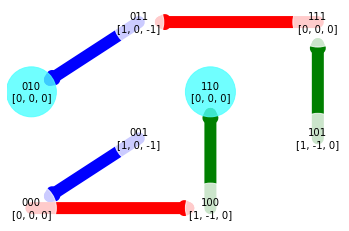

In [13]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": "fully_connected",
        'alpha': 0.3,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{}


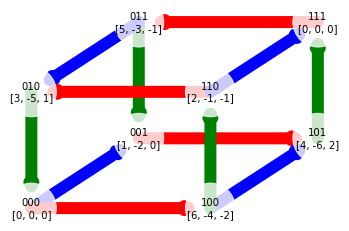

In [12]:
#example with no PNE
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[1,2],[9,9],[5,6]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error",
    'player_labels':[1,2,3]
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


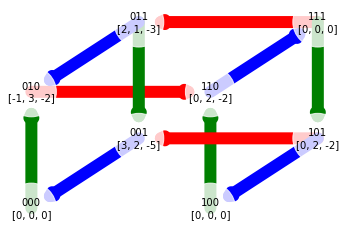

In [15]:
#example with no PNE
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[2,6],[10,6]],
        "topology": "fully_connected",
        'alpha': 1.0,
        'log_level': "error",
    'player_labels':[1,2,3]
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)

{'010': [0.0, 0.0, 0.0], '011': [0.0, 0.0, 0.0], '110': [0.0, 0.0, 0.0], '111': [0.0, 0.0, 0.0]}


C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


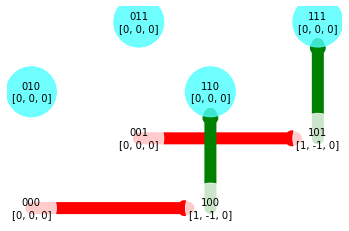

In [14]:
from corpgame import PolymatrixGame
game_settings = {
        "start_populations_matrix": [[6,4],[4,12],[10,6]],
        "topology": [[0,1],[1,2]],
        'alpha': 0.3,
        'log_level': "error"
    }
game = PolymatrixGame(**game_settings)
game.solve()
print(game.pne)
draw_3player_states(game.payoffs, game.pne)